In [404]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rnd
import numpy as np
import collections
%matplotlib inline

N = 5
p_sell =0.4
p_buy =0.4
num_play = 365

class Agent:
    def  __init__(self,id):
        self.id = id
        self.strategy = None # hold
        self.buy = p_buy
        self.sell = p_sell

In [426]:
def  decision(agent_list):
    for focal in agent_list:
        r = rnd.random()
        if 0<= r<focal.buy:
            focal.strategy = 1
        elif focal.buy<=r<=focal.buy+focal.sell:
            focal.strategy = -1
        else: 
            focal.strategy= 0

def count(agent_list):
    delta = sum(list(map(lambda agent:agent.strategy, agent_list)))
    return delta

def find_hub(G):
    degree_sequence = sorted([d for n, d in G.degree().items()])
    degreeCount = collections.Counter(degree_sequence)
    #calculate path lenght to the nearest influencer and inflencer node. 
    par = 0.7 # upper 100*(1-par)%  
    hub = [n for n, d in G.degree().items() if d>max(degreeCount.keys())*par]
    return hub

def find_influencer(G, hub):
    inf = []
    length = []
    store = [] # [influencer node, path length to influencer]
    isolates = nx.isolates(G)
    l1 = []
    l2 = []
    # find nodes which have no path to hub, then store in sub  
    sub=[] 
    for n in range(N):
        ns = nx.node_connected_component(G,n)
        if not ns & set(hub):sub.append(n)    

    tmp = []
    for n in G.degree().keys():
        if n in hub or n in isolates or n in sub:
            store.append([n,0])
        else:
            for h in hub:
                try:
                    tmp.append(nx.shortest_path_length(G,n,h))
                except:
                    pass
            mi = min(tmp)
            store.append([hub[tmp.index(mi)], mi])
            tmp.clear()
    num = [i for i in range(N)]
    #di = dict(zip(num,store)) # di = {node num:[nearest influencer, path length to nearest influencer]}
    influencers = [s[0] for s in store]
    lengths = [s[1] for s in store]
    return influencers, lengths

def update_strategy(agent_list, influencers, lengths):
    for focal, i,l in zip(agent_list, influencers,lengths):
        r = rnd.random()
        p = 1-0.1*l
        if 0<=r<p:
            focal.strategy  =  agent_list[i].strategy
        

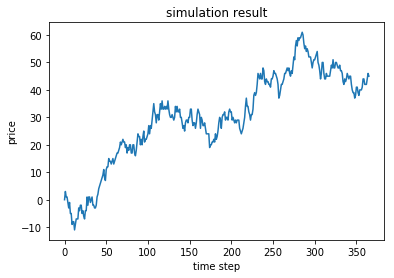

In [433]:
def main():
    agent_list = [Agent(id) for id in range(N)]
    price = 0
    prices = [price]
    G = nx.gnp_random_graph(N, 0.15)
    hub = find_hub(G)
    inflencers, lengths = find_influencer(G, hub)
    for play in range(num_play):
        decision(agent_list)
        update_strategy(agent_list, inflencers, lengths)
        delta = count(agent_list)
        price +=delta
        prices.append(price)
    plt.plot(prices)
    plt.xlabel("time step")
    plt.ylabel("price")
    plt.title("simulation result")
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
# agent_list = [Agent(id) for id in range(N)]
# G = nx.gnp_random_graph(N, 0.15)
# hub = find_hub(G)
# inf, length = find_influencer(G,hub)
# for i in range(N):
#     print (agent_list[i].strategy )       
# decision(agent_list)
# for i in range(N):
#     print (agent_list[i].strategy )     
# update_strategy(agent_list,inf,length)
# print("---*10")
# for i in range(N):
#     print (agent_list[i].strategy ) 